In [1]:
import numpy as np
import pandas as pd

In [2]:
from evaluator import Evaluator

In [3]:
# Generate data
np.random.seed(0)
n_samples = 50
data_1 = np.random.normal(loc=0.25, scale=0.05, size=n_samples)
data_2 = np.random.normal(loc=0.75, scale=0.05, size=n_samples)

# Labels (0 for the first distribution, 1 for the second)
labels_1 = np.zeros(n_samples, dtype=int)
labels_2 = np.ones(n_samples, dtype=int)

# Combine the data
preds = np.concatenate([data_1, data_2])
labels = np.concatenate([labels_1, labels_2])

# Threshold for predictions
threshold = 0.5

# Create & Shuffle dataFrame
df = pd.DataFrame({'pred': preds, 'label': labels})
df['label_pred'] = (df['pred'] >= threshold).astype(int)
df = df.sample(frac=1).reset_index(drop=True)

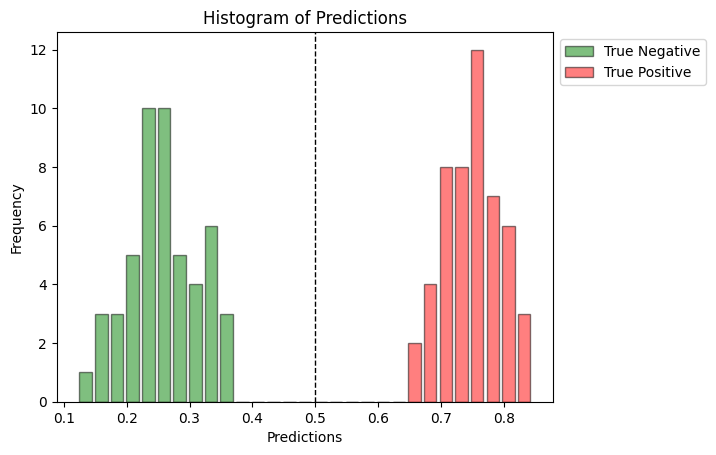

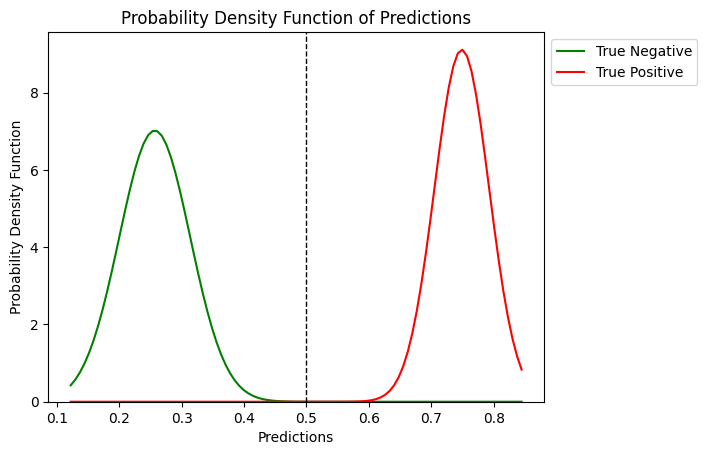

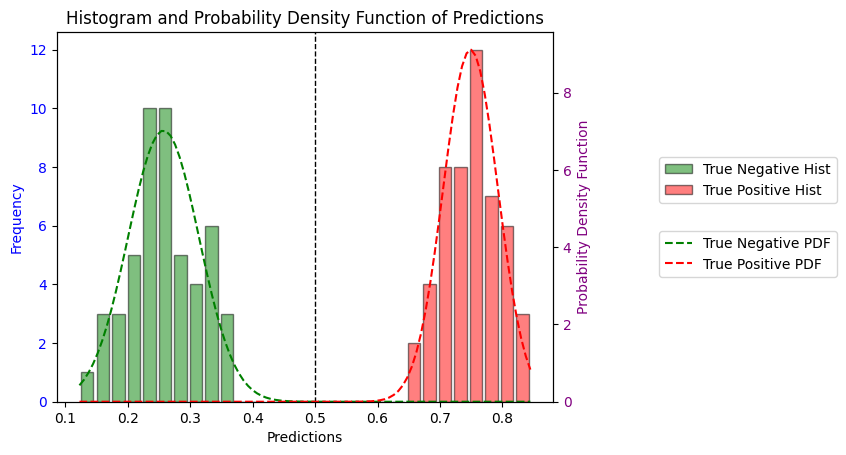

In [4]:
evaluator = Evaluator(df, threshold)

# Now you can use the evaluator to show the plots
evaluator.show_hist()
evaluator.show_pdf()
evaluator.show_hist_and_pdf()

In [5]:
display(evaluator.show_confusion_matrix_and_metrics_define())
display(evaluator.show_confusion_matrix_and_metrics())

,Pred Positive,Pred Negative,True Rates
,,,
Label Positive,True Positive (TP),False Negative (FN),TPR = TP / (TP + FN)
Label Negative,False Positive (FP),True Negative (TN),TNR = TN / (TN + FP)
False Rates,FPR = FP / (TP + FP),FNR = FN / (FN + TP),Accuracy = (TP + TN) / (TP + FP + FN + TN)


,Pred Positive,Pred Negative,True Rates
,,,
Label Positive,TP=50,FN=0,TPR=1.00
Label Negative,FP=0,TN=50,TNR=1.00
False Rates,FPR=0.00,FNR=0.00,Accuracy=1.00
